# **Import Library**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **Memuat Dataset dari Hasil Clustering**

In [16]:
# Memuat dataset 
data = pd.read_csv('Data_Clustering.csv')
data.head()

,age,educational-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,Cluster
0,25.0,7,40.0,3,1,4,6,3,2,1,38,1
1,38.0,9,47.5,3,8,2,4,0,4,1,38,2
2,28.0,12,40.0,1,4,2,10,0,4,1,38,0
3,44.0,10,40.0,3,11,2,6,0,2,1,38,1
4,29.0,9,40.0,3,8,4,9,4,2,1,38,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              34000 non-null  float64
 1   educational-num  34000 non-null  int64  
 2   hours-per-week   34000 non-null  float64
 3   workclass        34000 non-null  int64  
 4   education        34000 non-null  int64  
 5   marital-status   34000 non-null  int64  
 6   occupation       34000 non-null  int64  
 7   relationship     34000 non-null  int64  
 8   race             34000 non-null  int64  
 9   gender           34000 non-null  int64  
 10  native-country   34000 non-null  int64  
 11  Cluster          34000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 3.1 MB


# **Data Splitting**

In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identifikasi kolom kategori
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'gender', 'native-country']

# One-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_columns])

# Gabungkan hasil encoding dengan fitur numerik
numerical_columns = ['age', 'educational-num', 'hours-per-week']
X = pd.concat([data[numerical_columns], 
               pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())], axis=1)

C:\Users\ACER\miniconda3\envs\latihan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
# instance MinMaxScaler 
scaler = MinMaxScaler()

# Normalisasi semua kolom numeric
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])
y = data['Cluster']

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Tampilkan hasil set pelatihan dan uji
print(f'Training set shape: X_train={X_train.shape}, y_train={y_train.shape}')
print(f'Test set shape: X_test={X_test.shape}, y_test={y_test.shape}')

Training set shape: X_train=(27200, 11), y_train=(27200,)
Test set shape: X_test=(6800, 11), y_test=(6800,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [41]:
print(y_train.dtype)
print(y_test.dtype)

int32
int32


In [40]:
# Konversi target menjadi integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [32]:
# Pelatihan model menggunakan algoritma Random Forest dan SVM
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

print('Model Training Selesai')

Model Training Selesai


Pada model klasifikasi ini saya menggunakan model Random Forest dan Suport Vector Machine. Saya menggunakan kedua model ini dikarenakan model ini memiliki hasil yang paling optimal dari semua contoh model yang telah disediakan dalam kelas.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [42]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)' : tp, 
        'False Positive (FP)' : fp,
        'False Negative (FN)' : fn,
        'True Negative (TN)' : tn,
        'Accuracy' : accuracy_score(y_test, y_pred),
        'Precision' : precision_score(y_test, y_pred),
        'Recall' : recall_score(y_test, y_pred),
        'F1-Score' : f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test)
}

# Membuat dataframe untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0            Random Forest (RF)  0.999118   0.998811  0.997625  0.998217
1  Support Vector Machine (SVM)  0.998971   0.998217  0.997625  0.997921


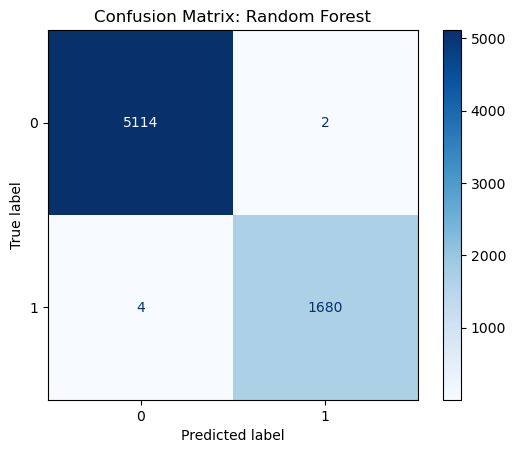

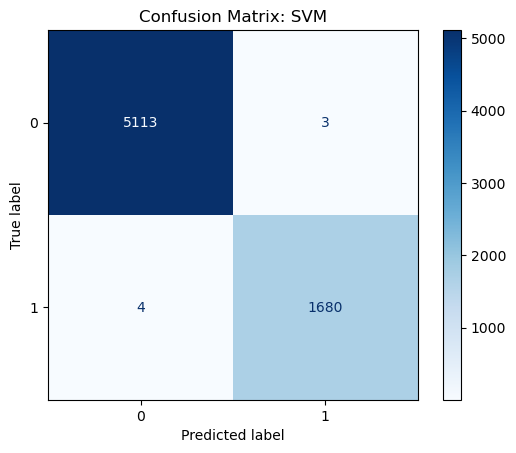

Random Forest Accuracy: 0.9991176470588236
SVM Accuracy: 0.9989705882352942


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualisasi Confusion Matrix: Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest')
plt.show()

# Visualisasi Confusion Matrix: SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: SVM')
plt.show()

Dari hasil yang diperoleh algoritma Random Forest memiliki accuracy sebesar 99,91% dan F1-Score 99,82% yang menunjukkan kemampuan yang sangat baik dalam melakukan klasifikasi. Pada Confusion matrix dapat . Hal ini juga dinampakkan pada algoritma SVM yang menujukkan hasil 99,89% accuracy dan F1-Score 99,79%. 

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.